# Finding the next NBA City

### Introduction

The sports entertainment industry is a multi-billion dollar industry. Comprised of four major sports leagues (the NFL, the NBA, MLB and the NHL) each with roughly 30 teams, the impact of these leagues is felt around the country. Yet, in spite of the seeming national saturation of sports teams and leagues, there is continual talk of adding additional teams to new cities to further expand their respective sports. 

A league that has seen growing popularity as of late is the National Basketball Association (NBA). In light of this, talk has been swirling of adding an expansion team to a new market. To further fuel these rumors, the NBA has relatively fewer teams than its two Fall/Winter sports league rivals; 30 teams vs 32 for the  NFL and (soon to be) 32 for the NHL.

With this as a backdrop, the NBA is looking to expand its team base and, therefore, fan and revenue base via expansion. The challenge is finding a city that is suitable for expansion and will create a corresponding increase in revenue without diluting the current product. 

The goal of this study is to help the NBA narrow down its search for suitable expansion cities. This will be done by looking at both bulk city data (population, TV market size, income) and the interests of the locals via popular venues and locales within the respective cities. 

In [1]:
# make the imports
import pandas as pd
import numpy as np
import requests
from bs4 import BeautifulSoup
import sys
#!{sys.executable} -m pip install lxml
#import lxml

### Data

In addition to the FourSqure locale data, there are 4 data sources we need:

1. City Population Data - https://en.m.wikipedia.org/wiki/List_of_United_States_cities_by_population
2. TV Market Data - https://en.wikipedia.org/wiki/List_of_United_States_television_markets
3. Metro Area income data - https://en.wikipedia.org/wiki/List_of_United_States_metropolitan_areas_by_per_capita_income
4. List of current NBA teams - https://www.basketball-reference.com/teams/ 

The first three are located in Wikipedia and will need to be scraped separately then merged for later use.

The last one was exported as a .csv file through the basketball-reference website and will be read-in to a pandas dataframe directly

#### Population Data

First, we'll pull in the population data from Wikipedia using the requests and Beutiful soup packages

In [2]:
#pd.set_option('display.height', 1000)
#pd.set_option('display.max_rows', 500)
#pd.set_option('display.max_columns', 500)
#pd.set_option('display.width', 1000)

In [3]:
pop_wiki = requests.get("https://en.m.wikipedia.org/wiki/List_of_United_States_cities_by_population")
pop_soup = BeautifulSoup(pop_wiki.content,'html')
#pop_soup

/usr/lib/python3/dist-packages/bs4/__init__.py:181: UserWarning: No parser was explicitly specified, so I'm using the best available HTML parser for this system ("lxml"). This usually isn't a problem, but if you run this code on another system, or in a different virtual environment, it may use a different parser and behave differently.

The code that caused this warning is on line 193 of the file /usr/lib/python3.6/runpy.py. To get rid of this warning, change code that looks like this:

 BeautifulSoup(YOUR_MARKUP})

to this:

 BeautifulSoup(YOUR_MARKUP, "lxml")

  markup_type=markup_type))


In [4]:
# get the table reference
# By inspection of HTML, table we are interested in is stored in index 3
table = pop_soup.find_all('table')[3]
#table

We will define a function for extracting the table into a dataframe for the population data wiki page

In [5]:
def get_table_data(table):
    
    # Extract the column names
    columns = []
    for c in table.find_all('th'):
        columns.append(c.get_text().strip())
   
    # get the remaining elements based on the length of the column headers
    num_cols = len(columns)
    # create an empty dataframe with the columns discovered
    df = pd.DataFrame()
    
    i=0
    row=[]
    
    for td in table.find_all('td'):
        #print(td.get_text())
        if ('sq' in td.get_text()) and ('mi' in td.get_text()):
            i=i-1
        else:
            row.append(td.get_text().strip())
        i+=1
        # once the number of elements in the rows equals the number of columns, add it to the df and reset the row
        if i==num_cols:
            i=0
            df = df.append(pd.DataFrame(row).T)
            row=[]
    df.columns=columns
    return df
   

Pulling the table and renameing columns where necessary

In [6]:
df = get_table_data(table)
cols = df.columns.values
cols[0]='Rank'
df.columns = cols
df.set_index('Rank', inplace=True) 
df

,City,State[c],2018estimate,2010Census,Change,2016 land area,2016 population density,Location
Rank,,,,,,,,
1,New York[d],New York,"8,398,748","8,175,133",+2.74%,780.9 km2,"10,933/km2",40°39′49″N 73°56′19″W﻿ / ﻿40.6635°N 73.9387°W﻿...
2,Los Angeles,California,"3,990,456","3,792,621",+5.22%,"1,213.9 km2","3,276/km2",34°01′10″N 118°24′39″W﻿ / ﻿34.0194°N 118.4108°...
3,Chicago,Illinois,"2,705,994","2,695,598",+0.39%,588.7 km2,"4,600/km2",41°50′15″N 87°40′54″W﻿ / ﻿41.8376°N 87.6818°W﻿...
4,Houston[3],Texas,"2,325,502","2,100,263",+10.72%,"1,651.1 km2","1,395/km2",29°47′12″N 95°23′27″W﻿ / ﻿29.7866°N 95.3909°W﻿...
5,Phoenix,Arizona,"1,660,272","1,445,632",+14.85%,"1,340.6 km2","1,200/km2",33°34′20″N 112°05′24″W﻿ / ﻿33.5722°N 112.0901°...
...,...,...,...,...,...,...,...,...
310,Edison[ad],New Jersey,"100,693","99,967",+0.73%,78.0 km2,"1,309/km2",40°30′14″N 74°20′58″W﻿ / ﻿40.5040°N 74.3494°W﻿...
311,Woodbridge[ad],New Jersey,"100,450","99,585",+0.87%,60.3 km2,"1,680/km2",40°33′39″N 74°17′34″W﻿ / ﻿40.5607°N 74.2927°W﻿...
312,San Angelo,Texas,"100,215","93,200",+7.53%,155.1 km2,649/km2,31°26′28″N 100°27′02″W﻿ / ﻿31.4411°N 100.4505°...


Now we need to simplify this data to only keep what we need (City, State, 2018 estimated population, 2016 population density)

In [7]:
df_pop = df[ ['City','State[c]','2018estimate','2016 population density'] ]
# rename the columns
df_pop.columns = ['City','State','Population','Density']
df_pop

,City,State,Population,Density
Rank,,,,
1,New York[d],New York,"8,398,748","10,933/km2"
2,Los Angeles,California,"3,990,456","3,276/km2"
3,Chicago,Illinois,"2,705,994","4,600/km2"
4,Houston[3],Texas,"2,325,502","1,395/km2"
5,Phoenix,Arizona,"1,660,272","1,200/km2"
...,...,...,...,...
310,Edison[ad],New Jersey,"100,693","1,309/km2"
311,Woodbridge[ad],New Jersey,"100,450","1,680/km2"
312,San Angelo,Texas,"100,215",649/km2


Lastly, we will remove the /km2 from the density column and convert to type float

In [8]:
df_pop['Density']=df_pop['Density'].replace('/km2','',regex=True)
df_pop['City']=df_pop['City'].replace('\[.*\]','',regex=True)
df_pop

/home/daniel/.local/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/home/daniel/.local/lib/python3.6/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


,City,State,Population,Density
Rank,,,,
1,New York,New York,"8,398,748","10,933"
2,Los Angeles,California,"3,990,456","3,276"
3,Chicago,Illinois,"2,705,994","4,600"
4,Houston,Texas,"2,325,502","1,395"
5,Phoenix,Arizona,"1,660,272","1,200"
...,...,...,...,...
310,Edison,New Jersey,"100,693","1,309"
311,Woodbridge,New Jersey,"100,450","1,680"
312,San Angelo,Texas,"100,215",649


#### Media Market Data

Next, we'll pull in the tv media market data from Wikipedia

In [9]:
tv_wiki = requests.get("https://en.wikipedia.org/wiki/List_of_United_States_television_markets")
tv_soup = BeautifulSoup(tv_wiki.content,'html')
#tv_soup

In [10]:
# get the table reference
# By inspection of HTML, table we are interested in is stored in index 1
table = tv_soup.find_all('table')[1]
#table

In [11]:
def get_tv_table_data(table):
    
    # Extract the column names
    columns = []
    for c in table.find_all('th'):
        if 'scope' in c.attrs:
            pass
        else:
            columns.append(c.get_text().strip())
   
    # get the remaining elements based on the length of the column headers
    num_cols = len(columns)
    # create an empty dataframe with the columns discovered
    df = pd.DataFrame()
    
    i=0
    row=[]
    
    # get the market column based on the th tag
    markets = []
    for market in table.find_all('th'):
        if 'scope' in market.attrs:
            markets.append(market.get_text().strip())
   
    # get the remaining elements based on the length of the column headers
    num_cols = len(columns)
    # create an empty dataframe with the columns discovered
    df = pd.DataFrame()
    
    i=0
    j=0
    row=[]
       
    for td in table.find_all('td'):
        if i==1:
            try:
                row.append(markets[j])
                j+=1
                i+=1
            except:
                pass

        # if it's a name with a link, get the name out of the link otherwise just append it to the row
        if td.find('a')!=None:
            row.append(td.find('a').get_text())
        else:
            row.append(td.get_text().strip())
        i+=1
        # once the number of elements in the rows equals the number of columns, add it to the df and reset the row
        if i==num_cols:
            i=0
            df = df.append(pd.DataFrame(row).T)
            row=[]

    df.columns=columns
    df.set_index('Rank[1]', inplace=True)
    return df

In [12]:
df_tv = get_tv_table_data(table)
df_tv.head()

,Market,State,Counties (or county-equivalents) covered,TV households (2018–19),Local ABC affiliate,Local CBS affiliate,Local CW affiliate,Local Fox affiliate,Local NBC affiliate,Other significant stations[2]
Rank[1],,,,,,,,,,
1,New York,New York,Bronx,"7,100,300 (6.441%)",WABC-TV,WCBS-TV,WPIX,WNYW,WNBC,WFTY-DT
2,Los Angeles,California,Inyo,"5,276,600 (4.786%)",KABC-TV,KCBS-TV,KTLA,KTTV,KNBC,KCAL-TV
3,Chicago,Illinois,Cook,"3,251,370 (2.949%)",WLS-TV,WBBM-TV,WCIU-TV,WFLD,WMAQ-TV,WGN-TV
4,Philadelphia,Pennsylvania,Berks,"2,816,850 (2.555%)",WPVI-TV,KYW-TV,WPSG,WTXF-TV,WCAU,WFPA-CD
5,Dallas-Fort Worth,Texas,Anderson,"2,622,070 (2.378%)",WFAA,KTVT,KDAF,KDFW,KXAS-TV,KDFI


Now we'll remove the extraneous information and keep only what we need

In [13]:
df_tv_market = df_tv[ ['Market', 'State', 'TV households (2018–19)']]
df_tv_market

,Market,State,TV households (2018–19)
Rank[1],,,
1,New York,New York,"7,100,300 (6.441%)"
2,Los Angeles,California,"5,276,600 (4.786%)"
3,Chicago,Illinois,"3,251,370 (2.949%)"
4,Philadelphia,Pennsylvania,"2,816,850 (2.555%)"
5,Dallas-Fort Worth,Texas,"2,622,070 (2.378%)"
...,...,...,...
209,North Platte,Nebraska,"12,830 (0.012%)"
210,Glendive,Montana,"3,590 (0.003%)"
N/A,American Samoa,Tutuila,KVZK-4


#### Median Income Data

Next, we'll pull in the median income data

In [14]:
inc_wiki = requests.get("https://en.wikipedia.org/wiki/List_of_United_States_metropolitan_areas_by_per_capita_income")
inc_soup = BeautifulSoup(inc_wiki.content,'html')
#inc_soup

In [15]:
# get the table reference
# By inspection of HTML, table we are interested in is stored in index 2
table = inc_soup.find_all('table')[2]
#table

In [16]:
df_inc = get_table_data(table)
df_inc.set_index('Rank', inplace=True)
df_inc.rename(columns={'Metropolitan statistical area':'Metro'}, inplace=True)
df_inc.drop('Population', axis=1,inplace=True)
df_inc

,Metro,Per capitaincome
Rank,,
1,"Washington-Arlington-Alexandria, D.C-Virginia-...","$47,411"
2,"San Jose-Santa Clara-Sunnyvale, California MSA","$40,392"
3,"Seattle-Tacoma-Bellevue, Washington MSA","$39,322"
4,"San Francisco-Oakland-Hayward, California MSA","$38,355"
5,"Boston–Worcester–Lawrence, Massachusetts–New H...","$37,311"
...,...,...
276,"McAllen–Edinburg–Mission, Texas MSA","$9,899"
277,"San Juan–Caguas–Arecibo, Puerto Rico CMSA","$9,140"
278,"Mayagüez, Puerto Rico MSA","$7,730"


### NBA Team Cities
Finally, we'll pull in the list of NBA team cities by CSV

In [17]:
df_teams = pd.read_csv('NBA_cities.csv')

# filter by current teams (where To = 2020)
df_teams = df_teams[ df_teams['To']==2020 ]
# get list of unique NBA cities
nba_cities = list(df_teams.Franchise.unique())
nba_cities

['Atlanta Hawks',
 'Boston Celtics',
 'Brooklyn Nets',
 'Charlotte Hornets',
 'Chicago Bulls',
 'Cleveland Cavaliers',
 'Dallas Mavericks',
 'Denver Nuggets',
 'Detroit Pistons',
 'Golden State Warriors',
 'Houston Rockets',
 'Indiana Pacers',
 'Los Angeles Clippers',
 'Los Angeles Lakers',
 'Memphis Grizzlies',
 'Miami Heat',
 'Milwaukee Bucks',
 'Minnesota Timberwolves',
 'New Orleans Pelicans',
 'New York Knicks',
 'Oklahoma City Thunder',
 'Orlando Magic',
 'Philadelphia 76ers',
 'Phoenix Suns',
 'Portland Trail Blazers',
 'Sacramento Kings',
 'San Antonio Spurs',
 'Toronto Raptors',
 'Utah Jazz',
 'Washington Wizards']

### Merge Data Sets for Use
Now we will merge all of the datasets into a usable dataframe.

We want to convert all numerical items to type float and add the per-capita income and TV market information to the exisintg population data

First we'll add the per capita income

In [18]:
# store metro and pci information
metros = list(df_inc.Metro)
pci = list(df_inc['Per capitaincome'])

# create a function to extract it
def get_merged_value(city,options,values):
    for i in range(len(options)):
        if city in options[i]:
            return values[i]
    return np.nan
            

df_pop['PCI'] = df_pop['City'].apply(lambda x: get_merged_value(x,metros,pci))
df_pop

/home/daniel/.local/lib/python3.6/site-packages/ipykernel_launcher.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  del sys.path[0]


,City,State,Population,Density,PCI
Rank,,,,,
1,New York,New York,"8,398,748","10,933","$24,581"
2,Los Angeles,California,"3,990,456","3,276","$21,170"
3,Chicago,Illinois,"2,705,994","4,600",NaN
4,Houston,Texas,"2,325,502","1,395","$21,701"
5,Phoenix,Arizona,"1,660,272","1,200","$21,907"
...,...,...,...,...,...
310,Edison,New Jersey,"100,693","1,309",NaN
311,Woodbridge,New Jersey,"100,450","1,680",NaN
312,San Angelo,Texas,"100,215",649,"$17,325"


The data needs to be converted to type 'float' as it is currently stored as an object.

Once stored as a float, we can interpolate on the data to fill any NaNs that exist.

In [19]:
# casting as type float
df_pop['Population'] = df_pop['Population'].str.replace(',','').astype('float')
df_pop['Density'] = df_pop['Density'].str.replace(',','').astype('float')
df_pop['PCI'] = df_pop['PCI'].str.replace(',','').str.replace('$','').astype('float')
# fixing the Nan, filling by state
df_data = df_pop.interpolate()
df_data.index = df_data.index.astype(int)
df_data.sort_index(inplace=True)
df_data

/home/daniel/.local/lib/python3.6/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/home/daniel/.local/lib/python3.6/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
/home/daniel/.local/lib/python3.6/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col

,City,State,Population,Density,PCI
Rank,,,,,
1,New York,New York,8398748.0,10933.0,24581.00
2,Los Angeles,California,3990456.0,3276.0,21170.00
3,Chicago,Illinois,2705994.0,4600.0,21435.50
4,Houston,Texas,2325502.0,1395.0,21701.00
5,Phoenix,Arizona,1660272.0,1200.0,21907.00
...,...,...,...,...,...
310,Edison,New Jersey,100693.0,1309.0,18161.50
311,Woodbridge,New Jersey,100450.0,1680.0,17743.25
312,San Angelo,Texas,100215.0,649.0,17325.00


In [20]:
# Check the types that result
df_pop.dtypes

City           object
State          object
Population    float64
Density       float64
PCI           float64
dtype: object

Adding the tv market in a similar fashion

In [21]:
market = list(df_tv_market['Market'])
households = list(df_tv_market['TV households (2018–19)'])

df_data['TV'] = df_data['City'].apply(lambda x: get_merged_value(x,market,households))
df_data

,City,State,Population,Density,PCI,TV
Rank,,,,,,
1,New York,New York,8398748.0,10933.0,24581.00,"7,100,300 (6.441%)"
2,Los Angeles,California,3990456.0,3276.0,21170.00,"5,276,600 (4.786%)"
3,Chicago,Illinois,2705994.0,4600.0,21435.50,"3,251,370 (2.949%)"
4,Houston,Texas,2325502.0,1395.0,21701.00,"2,423,360 (2.198%)"
5,Phoenix,Arizona,1660272.0,1200.0,21907.00,"1,864,420 (1.691%)"
...,...,...,...,...,...,...
310,Edison,New Jersey,100693.0,1309.0,18161.50,NaN
311,Woodbridge,New Jersey,100450.0,1680.0,17743.25,NaN
312,San Angelo,Texas,100215.0,649.0,17325.00,"52,790 (0.048%)"


In [22]:
# fix the NaN by interpolation after sorting by population
df_data['TV'] = df_data['TV'].str.replace('\(.*\)','').str.replace(',','').astype('float')
# fixing the Nan, filling by state
df_data = df_data.interpolate()
df_data.sort_index(inplace=True)
df_data

,City,State,Population,Density,PCI,TV
Rank,,,,,,
1,New York,New York,8398748.0,10933.0,24581.00,7100300.0
2,Los Angeles,California,3990456.0,3276.0,21170.00,5276600.0
3,Chicago,Illinois,2705994.0,4600.0,21435.50,3251370.0
4,Houston,Texas,2325502.0,1395.0,21701.00,2423360.0
5,Phoenix,Arizona,1660272.0,1200.0,21907.00,1864420.0
...,...,...,...,...,...,...
310,Edison,New Jersey,100693.0,1309.0,18161.50,366170.0
311,Woodbridge,New Jersey,100450.0,1680.0,17743.25,209480.0
312,San Angelo,Texas,100215.0,649.0,17325.00,52790.0


Finally, let's determine if the city already has an NBA team

1 = YES

0 = NO

In [23]:
# define a function to add it
def nba_city(city,nba_cities):
    for n in nba_cities:
        if city in n:
            return 1
    return 0

df_data['NBA']=df_data['City'].apply(lambda x: nba_city(x,nba_cities))
df_data

,City,State,Population,Density,PCI,TV,NBA
Rank,,,,,,,
1,New York,New York,8398748.0,10933.0,24581.00,7100300.0,1
2,Los Angeles,California,3990456.0,3276.0,21170.00,5276600.0,1
3,Chicago,Illinois,2705994.0,4600.0,21435.50,3251370.0,1
4,Houston,Texas,2325502.0,1395.0,21701.00,2423360.0,1
5,Phoenix,Arizona,1660272.0,1200.0,21907.00,1864420.0,1
...,...,...,...,...,...,...,...
310,Edison,New Jersey,100693.0,1309.0,18161.50,366170.0,0
311,Woodbridge,New Jersey,100450.0,1680.0,17743.25,209480.0,0
312,San Angelo,Texas,100215.0,649.0,17325.00,52790.0,0


In [24]:
df_data.NBA.value_counts()

# set outlier manually (Golden State = San Francisco)
cols = df_data['City']=='San Francisco'
df_data.loc[cols,'NBA']=1
# set outlier manually (Utah = Salt Lake City)
cols = df_data['City']=='Salt Lake City'
df_data.loc[cols,'NBA']=1
# set outlier manually (Minnesota = Minneapolis)
cols = df_data['City']=='Minneapolis'
df_data.loc[cols,'NBA']=1
# set outlier manually (Indiana = Indianapolis)
cols = df_data['City']=='Indianapolis'
df_data.loc[cols,'NBA']=1

df_data

,City,State,Population,Density,PCI,TV,NBA
Rank,,,,,,,
1,New York,New York,8398748.0,10933.0,24581.00,7100300.0,1
2,Los Angeles,California,3990456.0,3276.0,21170.00,5276600.0,1
3,Chicago,Illinois,2705994.0,4600.0,21435.50,3251370.0,1
4,Houston,Texas,2325502.0,1395.0,21701.00,2423360.0,1
5,Phoenix,Arizona,1660272.0,1200.0,21907.00,1864420.0,1
...,...,...,...,...,...,...,...
310,Edison,New Jersey,100693.0,1309.0,18161.50,366170.0,0
311,Woodbridge,New Jersey,100450.0,1680.0,17743.25,209480.0,0
312,San Angelo,Texas,100215.0,649.0,17325.00,52790.0,0


### Get the City Longitude and Latitude

Geo coordinates will be pulled from the geopy module and plotted with Folium

In [25]:
#!{sys.executable} -m pip install geopy
from geopy.geocoders import Nominatim # convert an address into latitude and longitude values

import folium # map rendering library

In [26]:
# create a function to add the latitude and longitude for each city
def get_long_lat(city,state,long=1):
    address = str(city)+', '+str(state)
    geolocator = Nominatim(user_agent="ny_explorer")
    location = geolocator.geocode(address)
    latitude = location.latitude
    longitude = location.longitude
    if long==1:
        return longitude
    else:
        return latitude
   
# get_long_lat('San Jose','California',0)

In [27]:
# add the long and lat to the dataframe
df_data['Long'] = df_data.apply(lambda x: get_long_lat(x['City'],x['State'],1),axis=1)
df_data['Lat'] = df_data.apply(lambda x: get_long_lat(x['City'],x['State'],0),axis=1)
df_data

,City,State,Population,Density,PCI,TV,NBA,Long,Lat
Rank,,,,,,,,,
1,New York,New York,8398748.0,10933.0,24581.00,7100300.0,1,-74.006015,40.712728
2,Los Angeles,California,3990456.0,3276.0,21170.00,5276600.0,1,-118.242767,34.053691
3,Chicago,Illinois,2705994.0,4600.0,21435.50,3251370.0,1,-87.624421,41.875562
4,Houston,Texas,2325502.0,1395.0,21701.00,2423360.0,1,-95.367697,29.758938
5,Phoenix,Arizona,1660272.0,1200.0,21907.00,1864420.0,1,-112.077346,33.448587
...,...,...,...,...,...,...,...,...,...
310,Edison,New Jersey,100693.0,1309.0,18161.50,366170.0,0,-74.394517,40.538238
311,Woodbridge,New Jersey,100450.0,1680.0,17743.25,209480.0,0,-74.286001,40.554180
312,San Angelo,Texas,100215.0,649.0,17325.00,52790.0,0,-100.439844,31.464836


We will calculate the distance to the closest NBA city so we can remove cities from our list that are already close to an NBA city. Distance is calculated based on the geodisic formula from the geopy module.

In [28]:
from geopy import distance

In [29]:
# define a function for calculating the min distance between a non-NBA city and all other NBA cities
def min_distance(lat,long,nba_cities):
    min_d = 999999
    city_coord = (lat,long)
    for i in range(len(nba_cities)):
        c_coord = (nba_cities.iloc[i,8],nba_cities.iloc[i,7])
        d = distance.distance(city_coord,c_coord).km
        if d<min_d:
            min_d = d
    return min_d

In [30]:
# collect a dataframe of only NBA cities
nba_cities = df_data[df_data['NBA']==1]

df_data['MinDistance'] = df_data.apply(lambda x: min_distance(x['Lat'],x['Long'],nba_cities),axis=1)
df_data

,City,State,Population,Density,PCI,TV,NBA,Long,Lat,MinDistance
Rank,,,,,,,,,,
1,New York,New York,8398748.0,10933.0,24581.00,7100300.0,1,-74.006015,40.712728,0.000000
2,Los Angeles,California,3990456.0,3276.0,21170.00,5276600.0,1,-118.242767,34.053691,0.000000
3,Chicago,Illinois,2705994.0,4600.0,21435.50,3251370.0,1,-87.624421,41.875562,0.000000
4,Houston,Texas,2325502.0,1395.0,21701.00,2423360.0,1,-95.367697,29.758938,0.000000
5,Phoenix,Arizona,1660272.0,1200.0,21907.00,1864420.0,1,-112.077346,33.448587,0.000000
...,...,...,...,...,...,...,...,...,...,...
310,Edison,New Jersey,100693.0,1309.0,18161.50,366170.0,0,-74.394517,40.538238,38.156939
311,Woodbridge,New Jersey,100450.0,1680.0,17743.25,209480.0,0,-74.286001,40.554180,29.513328
312,San Angelo,Texas,100215.0,649.0,17325.00,52790.0,0,-100.439844,31.464836,293.328546


Now, we'll remove cities that are less than 150 km from a current NBA city. Also, since most of the smaller cities can't actually support an NBA team, we will restrict the list to the 120 largest cities remaining. This will also help us reduce the size of the data set when we start adding the location data from FourSquare

In [31]:
# take only cities that are more than 150 km from an NBA city and of these, the top 120 largest cities 
# to both reduce data size and the realization that small cities  won't be able support an NBA franchse
city_data = df_data[ (df_data['NBA']==1) | (df_data['MinDistance']>149) ].iloc[0:120]
city_data

,City,State,Population,Density,PCI,TV,NBA,Long,Lat,MinDistance
Rank,,,,,,,,,,
1,New York,New York,8398748.0,10933.0,24581.0,7100300.0,1,-74.006015,40.712728,0.000000
2,Los Angeles,California,3990456.0,3276.0,21170.0,5276600.0,1,-118.242767,34.053691,0.000000
3,Chicago,Illinois,2705994.0,4600.0,21435.5,3251370.0,1,-87.624421,41.875562,0.000000
4,Houston,Texas,2325502.0,1395.0,21701.0,2423360.0,1,-95.367697,29.758938,0.000000
5,Phoenix,Arizona,1660272.0,1200.0,21907.0,1864420.0,1,-112.077346,33.448587,0.000000
...,...,...,...,...,...,...,...,...,...,...
222,Fargo,North Dakota,124844.0,950.0,19910.0,228740.0,0,-96.789821,46.877229,345.669399
224,Columbia,Missouri,123180.0,717.0,20902.0,389590.0,0,-92.333737,38.951883,468.274367
225,Abilene,Texas,122999.0,442.0,17176.0,104440.0,0,-99.733301,32.446674,278.020276


Let's now create a map of the US with the city data plotted. The size of the marker is proportional to the city's population

In [32]:
# create map of US
latitude = 38.8777
longitude = -97.38
map_us = folium.Map(location=[latitude, longitude], zoom_start=4)

# add city markers to map, color them Red if they are already an NBA city and Blue otherwise
for lat, lng, label, nba, pop in zip(city_data['Lat'], city_data['Long'], city_data['City'], city_data['NBA'], city_data['Population']):
    c = 'blue'
    r = min(max(round(pop/100000,0),1),10)
    #print(r)
    if nba==1:
        c='red'
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius=r,
        popup=label,
        color=c,
        fill=True,
        fill_color='#3186cc',
        fill_opacity=0.7,
        legend_name='NBA Team',
        parse_html=False).add_to(map_us)  

map_us


### Adding the FourSquare Data

In [33]:
CLIENT_ID = 'X1RDABIJGUOLEDZZHTFOOIME4KPAMKJPOXRRZZLYWJD2NBHT' # your Foursquare ID
CLIENT_SECRET = 'TNMIFQJTTJ3OIHUHPRA4XPZOXLAXKC40BYPXUH3PTBXFWTEU' # your Foursquare Secret
VERSION = '20180605' # Foursquare API version

print('Your credentails:')
print('CLIENT_ID: ' + CLIENT_ID)
print('CLIENT_SECRET:' + CLIENT_SECRET)

Your credentails:
CLIENT_ID: X1RDABIJGUOLEDZZHTFOOIME4KPAMKJPOXRRZZLYWJD2NBHT
CLIENT_SECRET:TNMIFQJTTJ3OIHUHPRA4XPZOXLAXKC40BYPXUH3PTBXFWTEU


In [34]:
latitude = 40.712728
longitude = -74.006015
radius=5000
LIMIT=100
# create the API request URL
url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
     CLIENT_ID, 
     CLIENT_SECRET, 
     VERSION, 
     latitude, 
     longitude, 
     radius, 
     LIMIT)
            
# make the GET request
results = requests.get(url).json() 
results


{'meta': {'code': 200, 'requestId': '5d7e0d37f1110b0038ef3e63'},
 'response': {'suggestedFilters': {'header': 'Tap to show:',
   'filters': [{'name': '$-$$$$', 'key': 'price'},
    {'name': 'Open now', 'key': 'openNow'}]},
  'headerLocation': 'New York',
  'headerFullLocation': 'New York',
  'headerLocationGranularity': 'city',
  'totalResults': 235,
  'suggestedBounds': {'ne': {'lat': 40.75772804500004,
    'lng': -73.94675820643096},
   'sw': {'lat': 40.667727954999954, 'lng': -74.06527179356905}},
  'groups': [{'type': 'Recommended Places',
    'name': 'recommended',
    'items': [{'reasons': {'count': 0,
       'items': [{'summary': 'This spot is popular',
         'type': 'general',
         'reasonName': 'globalInteractionReason'}]},
      'venue': {'id': '57f0689d498e7d49d9189369',
       'name': 'The Bar Room at Temple Court',
       'location': {'address': '123 Nassau St',
        'lat': 40.7114477287544,
        'lng': -74.00680157032005,
        'labeledLatLngs': [{'label': 

Let's write a function to get nearby venues for each city in our list.
We will consider venues within 5 km of the city center, limiting our response to 100. Since the FourSquare API limits the number of venues returned to 100, the explore venues call was made 9 times for each city. Once at the longitude and latitude of the city plus 8 more time at the different permutations of longitude and latitude +/- 0.2. 

In [35]:
def getCityVenues(cities, states, latitudes, longitudes, radius=5000, LIMIT=100):
    
    venues_list=[]
    for city, state, lat, lng in zip(cities, states, latitudes, longitudes):
        print(city, state)
        
        # will repeat this request 9 times per city to get enough location data
        # once at the base lat/long and the one at 0.2 increments at each
        lats = [lat,lat,lat,lat+0.2,lat-0.2,lat+0.2,lat+0.2,lat-0.2,lat-0.2]
        lngs = [lng,lng+0.2,lng-0.2,lng,lng,lng+0.2,lng-0.2,lng+0.2,lng-0.2]
        for la, ln in zip(lats,lngs):
            # create the API request URL
            url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&section=trending&radius={}&limit={}'.format(
                CLIENT_ID, 
                CLIENT_SECRET, 
                VERSION, 
                la, 
                ln, 
                radius, 
                LIMIT)
            
            try:
                # make the GET request
                results = requests.get(url).json()["response"]['groups'][0]['items']
                print("Venues Pulled = ", len(results))
                # return only relevant information for each nearby venue
                venues_list.append([(
                    city,
                    state, 
                    lat, 
                    lng, 
                    v['venue']['name'], 
                    v['venue']['location']['lat'], 
                    v['venue']['location']['lng'],  
                    v['venue']['categories'][0]['name']) for v in results])
            except Exception as e:
                print(e)
                
    city_venues = pd.DataFrame([item for venue_list in venues_list for item in venue_list])
    print(city_venues)
    city_venues.columns = ['City', 
                           'State',
                           'Latitude', 
                           'Longitude', 
                           'Venue', 
                           'Venue Lat', 
                           'Venue Long', 
                           'Venue Category']
    
    return(city_venues)

In [36]:
# now let's collect the city venues
city_venues = getCityVenues(cities=city_data['City'], states=city_data['State'],
                                   latitudes=city_data['Lat'],
                                   longitudes=city_data['Long']
                                  )

city_venues

New York New York
Venues Pulled =  100
Venues Pulled =  100
Venues Pulled =  100
Venues Pulled =  100
Venues Pulled =  4
Venues Pulled =  100
Venues Pulled =  100
Venues Pulled =  3
Venues Pulled =  100
Los Angeles California
Venues Pulled =  100
Venues Pulled =  100
Venues Pulled =  100
Venues Pulled =  56
Venues Pulled =  100
Venues Pulled =  4
Venues Pulled =  100
Venues Pulled =  100
Venues Pulled =  100
Chicago Illinois
Venues Pulled =  100
Venues Pulled =  2
Venues Pulled =  100
Venues Pulled =  11
Venues Pulled =  100
Venues Pulled =  2
Venues Pulled =  100
Venues Pulled =  29
Venues Pulled =  100
Houston Texas
Venues Pulled =  100
Venues Pulled =  100
Venues Pulled =  100
Venues Pulled =  100
Venues Pulled =  100
Venues Pulled =  82
Venues Pulled =  100
Venues Pulled =  100
Venues Pulled =  100
Phoenix Arizona
Venues Pulled =  100
Venues Pulled =  100
Venues Pulled =  66
Venues Pulled =  100
Venues Pulled =  2
Venues Pulled =  100
Venues Pulled =  100
Venues Pulled =  100
Venue

Venues Pulled =  9
Cleveland Ohio
Venues Pulled =  100
Venues Pulled =  100
Venues Pulled =  71
Venues Pulled =  0
Venues Pulled =  79
Venues Pulled =  1
Venues Pulled =  0
Venues Pulled =  85
Venues Pulled =  67
Bakersfield California
Venues Pulled =  100
Venues Pulled =  5
Venues Pulled =  5
Venues Pulled =  0
Venues Pulled =  4
Venues Pulled =  0
Venues Pulled =  5
Venues Pulled =  8
Venues Pulled =  1
Honolulu Hawaii
Venues Pulled =  100
Venues Pulled =  56
Venues Pulled =  100
Venues Pulled =  23
Venues Pulled =  0
Venues Pulled =  0
Venues Pulled =  77
Venues Pulled =  0
Venues Pulled =  0
Corpus Christi Texas
Venues Pulled =  100
Venues Pulled =  7
Venues Pulled =  14
Venues Pulled =  12
Venues Pulled =  1
Venues Pulled =  2
Venues Pulled =  3
Venues Pulled =  58
Venues Pulled =  0
Lexington Kentucky
Venues Pulled =  100
Venues Pulled =  5
Venues Pulled =  45
Venues Pulled =  43
Venues Pulled =  3
Venues Pulled =  8
Venues Pulled =  4
Venues Pulled =  5
Venues Pulled =  10
Hende

Venues Pulled =  47
Venues Pulled =  46
Mobile Alabama
Venues Pulled =  100
Venues Pulled =  53
Venues Pulled =  91
Venues Pulled =  9
Venues Pulled =  0
Venues Pulled =  2
Venues Pulled =  3
Venues Pulled =  31
Venues Pulled =  15
Cape Coral Florida
Venues Pulled =  100
Venues Pulled =  93
Venues Pulled =  8
Venues Pulled =  9
Venues Pulled =  4
Venues Pulled =  8
Venues Pulled =  1
Venues Pulled =  100
Venues Pulled =  0
Shreveport Louisiana
Venues Pulled =  100
Venues Pulled =  9
Venues Pulled =  6
Venues Pulled =  8
Venues Pulled =  5
Venues Pulled =  0
Venues Pulled =  7
Venues Pulled =  1
Venues Pulled =  4
Knoxville Tennessee
Venues Pulled =  100
Venues Pulled =  4
Venues Pulled =  90
Venues Pulled =  6
Venues Pulled =  74
Venues Pulled =  5
Venues Pulled =  45
Venues Pulled =  4
Venues Pulled =  10
Brownsville Texas
Venues Pulled =  100
Venues Pulled =  2
Venues Pulled =  0
Venues Pulled =  19
Venues Pulled =  0
Venues Pulled =  8
Venues Pulled =  11
Venues Pulled =  0
Venues P

,City,State,Latitude,Longitude,Venue,Venue Lat,Venue Long,Venue Category
0,New York,New York,40.712728,-74.006015,Trader Joe's,40.725611,-74.004985,Grocery Store
1,New York,New York,40.712728,-74.006015,Gotham Archery,40.682504,-73.986032,Athletics & Sports
2,New York,New York,40.712728,-74.006015,SoulCycle Brooklyn Heights,40.692253,-73.991042,Cycle Studio
3,New York,New York,40.712728,-74.006015,Aire Ancient Baths,40.718141,-74.004941,Spa
4,New York,New York,40.712728,-74.006015,Cafe Mogador,40.727277,-73.984505,Moroccan Restaurant
...,...,...,...,...,...,...,...,...
42613,Hartford,Connecticut,41.764582,-72.690855,Southington Drive-In,41.565738,-72.879556,Movie Theater
42614,Hartford,Connecticut,41.764582,-72.690855,Zingarella,41.587763,-72.892008,Italian Restaurant
42615,Hartford,Connecticut,41.764582,-72.690855,Southington Rails To Trails,41.587472,-72.892240,Trail
42616,Hartford,Connecticut,41.764582,-72.690855,The Hop Knot Southington,41.564131,-72.884516,Beer Bar


In [37]:
city_venues

,City,State,Latitude,Longitude,Venue,Venue Lat,Venue Long,Venue Category
0,New York,New York,40.712728,-74.006015,Trader Joe's,40.725611,-74.004985,Grocery Store
1,New York,New York,40.712728,-74.006015,Gotham Archery,40.682504,-73.986032,Athletics & Sports
2,New York,New York,40.712728,-74.006015,SoulCycle Brooklyn Heights,40.692253,-73.991042,Cycle Studio
3,New York,New York,40.712728,-74.006015,Aire Ancient Baths,40.718141,-74.004941,Spa
4,New York,New York,40.712728,-74.006015,Cafe Mogador,40.727277,-73.984505,Moroccan Restaurant
...,...,...,...,...,...,...,...,...
42613,Hartford,Connecticut,41.764582,-72.690855,Southington Drive-In,41.565738,-72.879556,Movie Theater
42614,Hartford,Connecticut,41.764582,-72.690855,Zingarella,41.587763,-72.892008,Italian Restaurant
42615,Hartford,Connecticut,41.764582,-72.690855,Southington Rails To Trails,41.587472,-72.892240,Trail
42616,Hartford,Connecticut,41.764582,-72.690855,The Hop Knot Southington,41.564131,-72.884516,Beer Bar


Next, we need to extract and one-hot the locale information

In [38]:
# define a function that extracts the category of the venue
def get_category_type(row):
    try:
        categories_list = row['categories']
    except:
        categories_list = row['venue.categories']
        
    if len(categories_list) == 0:
        return None
    else:
        return categories_list[0]['name']

In [39]:
city_venues['Venue Category'].value_counts()

Pizza Place             1808
Coffee Shop             1525
Fast Food Restaurant    1504
Mexican Restaurant      1461
Sandwich Place          1459
                        ... 
Tunnel                     1
Kebab Restaurant           1
Currency Exchange          1
Town                       1
Betting Shop               1
Name: Venue Category, Length: 533, dtype: int64

In [40]:
# one hot encoding
cities_onehot = pd.get_dummies(city_venues[['Venue Category']], prefix="", prefix_sep="")

# add city and state information back in
cities_onehot['City'] = city_venues['City'] 
cities_onehot['State'] = city_venues['State'] 
cities_onehot.head()

,ATM,Accessories Store,Acupuncturist,Adult Boutique,Advertising Agency,Afghan Restaurant,African Restaurant,Airport Terminal,American Restaurant,Amphitheater,...,Whisky Bar,Wine Bar,Wine Shop,Winery,Wings Joint,Women's Store,Yoga Studio,Zoo,Zoo Exhibit,State
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,New York
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,New York
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,New York
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,New York
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,New York


In [41]:
# move city and state back to the front
fixed_columns = [cities_onehot.columns[-2]] + [cities_onehot.columns[-1]] + list(cities_onehot.columns[:-2])
cities_onehot = cities_onehot[fixed_columns]

cities_onehot.head()

,Zoo Exhibit,State,ATM,Accessories Store,Acupuncturist,Adult Boutique,Advertising Agency,Afghan Restaurant,African Restaurant,Airport Terminal,...,Waterfront,Weight Loss Center,Whisky Bar,Wine Bar,Wine Shop,Winery,Wings Joint,Women's Store,Yoga Studio,Zoo
0,0,New York,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,New York,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,New York,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,New York,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,New York,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


Grouping the data by city

In [42]:
grouped_city_venues = cities_onehot.groupby('City').mean().reset_index()
#grouped_city_venues = cities_onehot.groupby('City').sum().reset_index()
grouped_city_venues.head()

,City,Zoo Exhibit,ATM,Accessories Store,Acupuncturist,Adult Boutique,Advertising Agency,Afghan Restaurant,African Restaurant,Airport Terminal,...,Waterfront,Weight Loss Center,Whisky Bar,Wine Bar,Wine Shop,Winery,Wings Joint,Women's Store,Yoga Studio,Zoo
0,Abilene,0.0,0.000,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0,...,0.0,0.0,0.0,0.017094,0.000000,0.0,0.008547,0.0,0.0,0.000000
1,Albuquerque,0.0,0.005,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0,...,0.0,0.0,0.0,0.000000,0.005000,0.0,0.000000,0.0,0.0,0.000000
2,Amarillo,0.0,0.000,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0,...,0.0,0.0,0.0,0.008772,0.000000,0.0,0.000000,0.0,0.0,0.000000
3,Anchorage,0.0,0.000,0.004831,0.0,0.0,0.0,0.0,0.000000,0.0,...,0.0,0.0,0.0,0.009662,0.000000,0.0,0.004831,0.0,0.0,0.000000
4,Atlanta,0.0,0.000,0.002475,0.0,0.0,0.0,0.0,0.001238,0.0,...,0.0,0.0,0.0,0.002475,0.003713,0.0,0.009901,0.0,0.0,0.001238


In [43]:
grouped_city_venues.shape

(118, 533)

Finish merging the data sets

In [44]:
# merge with the city data 
df_cities = city_data.merge(grouped_city_venues,on='City',how='left')

In [45]:
df_cities.head()

,City,State,Population,Density,PCI,TV,NBA,Long,Lat,MinDistance,...,Waterfront,Weight Loss Center,Whisky Bar,Wine Bar,Wine Shop,Winery,Wings Joint,Women's Store,Yoga Studio,Zoo
0,New York,New York,8398748.0,10933.0,24581.0,7100300.0,1,-74.006015,40.712728,0.0,...,0.000000,0.0,0.000000,0.004243,0.004243,0.0,0.000000,0.000000,0.002829,0.000000
1,Los Angeles,California,3990456.0,3276.0,21170.0,5276600.0,1,-118.242767,34.053691,0.0,...,0.000000,0.0,0.002632,0.002632,0.003947,0.0,0.002632,0.000000,0.003947,0.001316
2,Chicago,Illinois,2705994.0,4600.0,21435.5,3251370.0,1,-87.624421,41.875562,0.0,...,0.001838,0.0,0.000000,0.000000,0.000000,0.0,0.003676,0.000000,0.003676,0.001838
3,Houston,Texas,2325502.0,1395.0,21701.0,2423360.0,1,-95.367697,29.758938,0.0,...,0.000000,0.0,0.000000,0.006803,0.003401,0.0,0.009070,0.001134,0.001134,0.000000
4,Phoenix,Arizona,1660272.0,1200.0,21907.0,1864420.0,1,-112.077346,33.448587,0.0,...,0.000000,0.0,0.000000,0.002981,0.001490,0.0,0.002981,0.000000,0.002981,0.000000


### Methodology -- Exploratory Data Analyis

Let's take an initial exploratory look at the data. Information and visualization that will help us see what NBA cities look like include
- Gropued statistics population, per capita income and TV market size for an NBA city
- Box plots of population, income and TV market size,colored by if it is an NBA city or not
- Scatter plot of TV market size vs population size colored by NBA city
- Bar charts comparing locale data for NBA vs non-NBA cities

Looking at simple statistics first:

In [46]:
# setting up the formatting
pd.options.display.float_format = '{:,.0f}'.format

In [47]:
df_cities.groupby('NBA')[['Population']].describe()

Population                                                                
         count      mean       std     min     25%     50%       75%       max
NBA                                                                           
0           93   281,508   208,685 122,587 152,958 200,217   302,605 1,425,976
1           27 1,283,714 1,656,110 200,591 503,286 694,583 1,438,640 8,398,748

In [48]:
df_cities.groupby('NBA')[['TV']].describe()

TV                                                                    
    count      mean       std     min       25%       50%       75%       max
NBA                                                                          
0      93   572,535   410,287  70,220   273,500   425,800   681,330 1,875,420
1      27 1,998,470 1,430,812 623,390 1,064,845 1,697,840 2,418,915 7,100,300

In [49]:
df_cities.groupby('NBA')[['PCI']].describe()

PCI                                                
    count   mean   std    min    25%    50%    75%    max
NBA                                                      
0      93 21,324 5,005  9,899 19,524 20,781 22,926 39,322
1      27 25,424 7,012 18,518 21,334 23,003 24,934 47,411

The main takeaways we can pull from this summary are
- NBA cities tend to have higher populations but not all high population cities have an NBA city
- statistical difference in per capita income are negligible for the two sets
- The TV market size is much larger for an NBA dity than it is for a non-NBA city

Let's plot the data to get a more clear picture of these trends

In [50]:
# pull in the required modules
import matplotlib.pyplot as plt
import matplotlib.cm as cm
#!{sys.executable} -m pip install seaborn
import seaborn as sns

Plot the box-plots of interest

(0, 3000000)

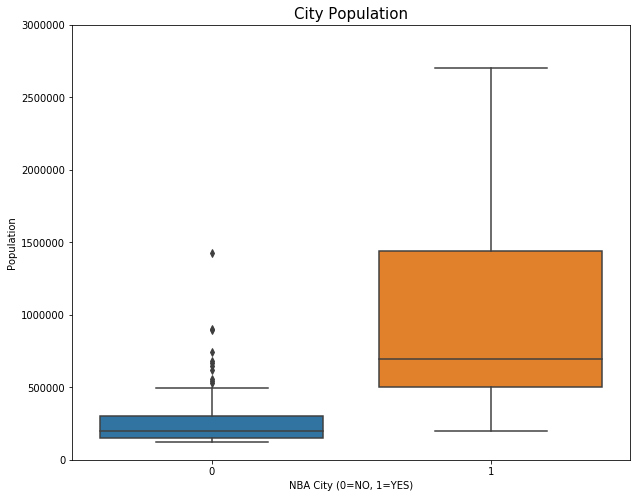

In [51]:
# plotting the population box plots
plt.figure(figsize=(10,8))
ax = sns.boxplot(x='NBA',y='Population', data=df_cities)
ax.set_xlabel('NBA City (0=NO, 1=YES)')
ax.set_ylabel('Population')
ax.set_title('City Population', size=15)
ax.set_ylim([0,3000000])

Text(0.5, 1.0, 'TV Market Size')

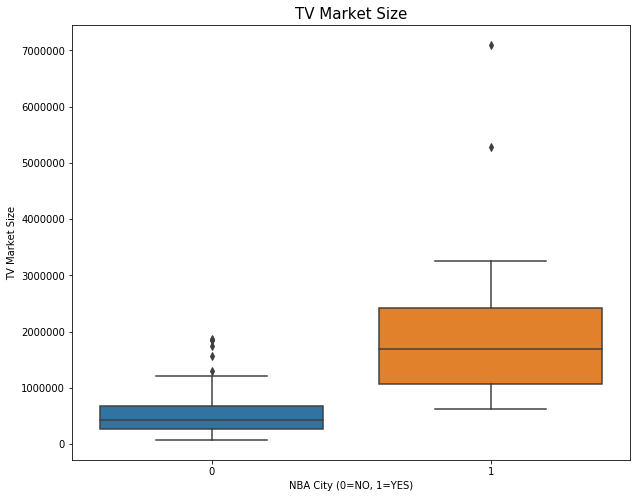

In [52]:
plt.figure(figsize=(10,8))
ax = sns.boxplot(x='NBA',y='TV', data=df_cities)
ax.set_ylabel('TV Market Size')
ax.set_xlabel('NBA City (0=NO, 1=YES)')
ax.set_title('TV Market Size', size=15)

Text(0.5, 1.0, 'Per Capita Income')

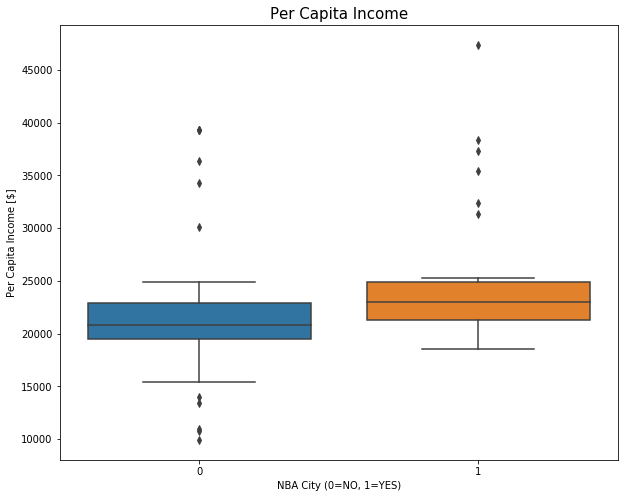

In [53]:
plt.figure(figsize=(10,8))
ax = sns.boxplot(x='NBA',y='PCI', data=df_cities)
ax.set_ylabel('Per Capita Income [$]')
ax.set_xlabel('NBA City (0=NO, 1=YES)')
ax.set_title('Per Capita Income', size=15)

No handles with labels found to put in legend.


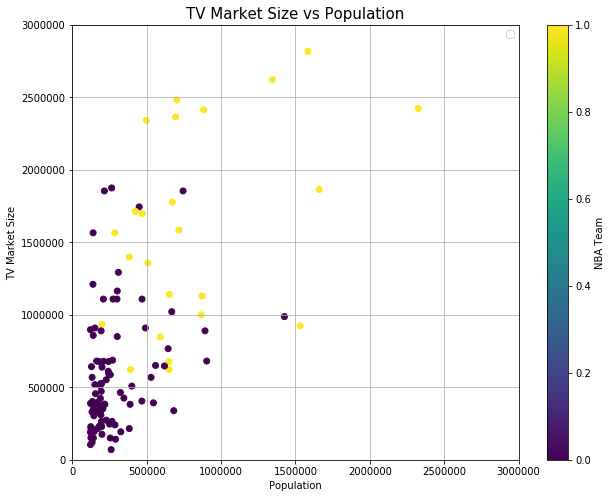

In [54]:
# Now let's plot the TV Market vs city data, colored by NBA city
plt.figure(figsize=(10,8))
sc = plt.scatter(df_cities['Population'],df_cities['TV'], c=df_cities['NBA'])
plt.ylabel('TV Market Size')
plt.xlabel('Population')
plt.legend(loc='best')
plt.grid(True)
cb = plt.colorbar(sc)
cb.set_label('NBA Team')
plt.xlim([0,3000000])
plt.ylim(0,3000000)
plt.title('TV Market Size vs Population', size=15)
plt.show()

In [55]:
# setting up the formatting
pd.options.display.float_format = '{:.3f}'.format
# define a function to return top venues by city
top_venues = pd.DataFrame()

def get_top_venues(num_venues,row):
    # drop the non venue data
    categories = row.iloc[10:]
    categories_sorted = categories.sort_values(ascending=False)
    return categories_sorted[0:num_venues]

get_top_venues(10,df_cities.iloc[0])

Pizza Place          0.054
Italian Restaurant   0.044
Park                 0.042
Bakery               0.033
Ice Cream Shop       0.028
Coffee Shop          0.028
Bar                  0.027
Gym                  0.021
Bagel Shop           0.021
Pharmacy             0.020
Name: 0, dtype: object

To visualize the FourSquare locale data, let's gorup the cities by whether or not they had an NBA team and take the mean of the locale information. We can create a bar chart showing how the mean percentage of total venues by category between NBA and non-NBA cities.


In [56]:
# creating a new data frame with mean venues by NBA city or not
df_top_venues = df_cities.groupby('NBA').mean()
df_top_venues = df_top_venues.drop(['Density','TV','Population','PCI','Long','Lat','MinDistance'],1)
df_top_venues = df_top_venues.T
df_top_venues = df_top_venues[ (df_top_venues[0]>0.003)& (df_top_venues[1]>0.003) ]
df_top_venues

NBA,0,1
American Restaurant,0.031,0.031
Asian Restaurant,0.005,0.007
BBQ Joint,0.011,0.008
Bakery,0.011,0.015
Bank,0.005,0.009
...,...,...
Theater,0.004,0.005
Trail,0.009,0.008
Video Game Store,0.003,0.004
Video Store,0.008,0.006


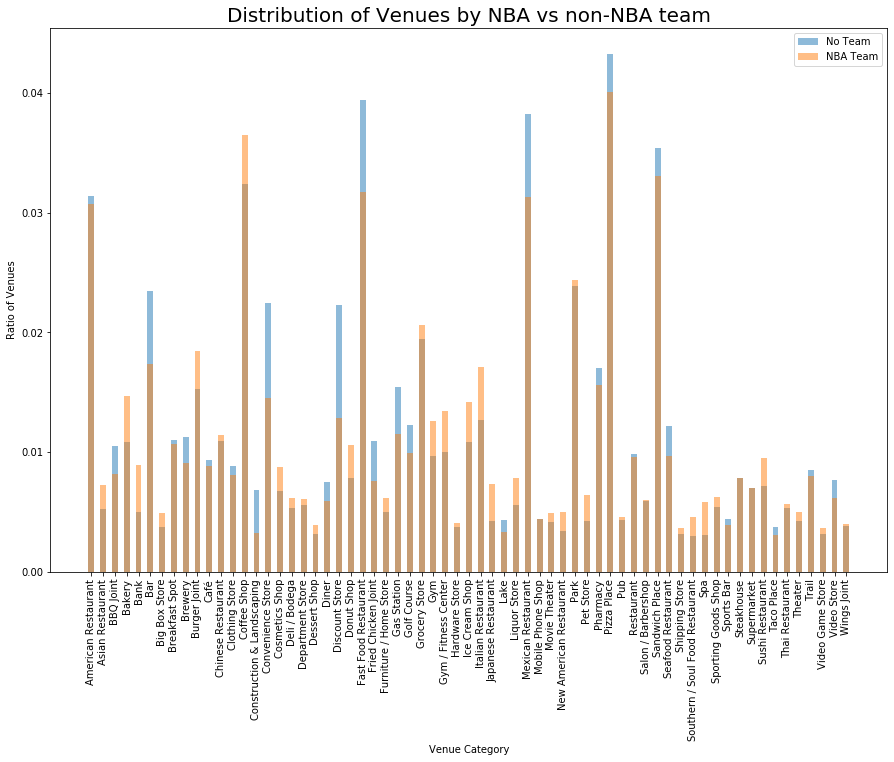

In [57]:
plt.figure(figsize=(15,10))
plt.bar(df_top_venues.index.values,df_top_venues[0],alpha=0.5, label='No Team', align='center', width=0.5)
plt.bar(df_top_venues.index.values,df_top_venues[1],alpha=0.5, label='NBA Team', align='center', width=0.5)
plt.xticks(rotation=90)
plt.title('Distribution of Venues by NBA vs non-NBA team', size=20)
plt.ylabel('Ratio of Venues')
plt.xlabel('Venue Category')
plt.legend(loc='best')
plt.show()

To simplify the data shown above, let's create a delta of the two means (NBA vs non-NBA) and a bar chart showing cases where the delta was greater than 0.0015. Delta here is NBA city minus non-NBA city implying positive bars are more often found in NBA cities than non-NBA cities. 

In [58]:
# creating a new data frame with biggest differences between an average NBA city and a non NBA city
df_top_venues = df_cities.groupby('NBA').mean()
df_top_venues = df_top_venues.drop(['Density','TV','Population','PCI','Long','Lat','MinDistance'],1)
df_top_venues = df_top_venues.T
df_top_venues['diff'] = df_top_venues[1]-df_top_venues[0]
df_top_venues = df_top_venues[ (abs(df_top_venues['diff'])>0.0015) ]
df_top_venues

NBA,0,1,diff
Asian Restaurant,0.005,0.007,0.002
BBQ Joint,0.011,0.008,-0.002
Bagel Shop,0.002,0.004,0.002
Bakery,0.011,0.015,0.004
Bank,0.005,0.009,0.004
Bar,0.023,0.017,-0.006
Baseball Field,0.005,0.003,-0.002
Beach,0.007,0.001,-0.006
Brewery,0.011,0.009,-0.002
Burger Joint,0.015,0.018,0.003


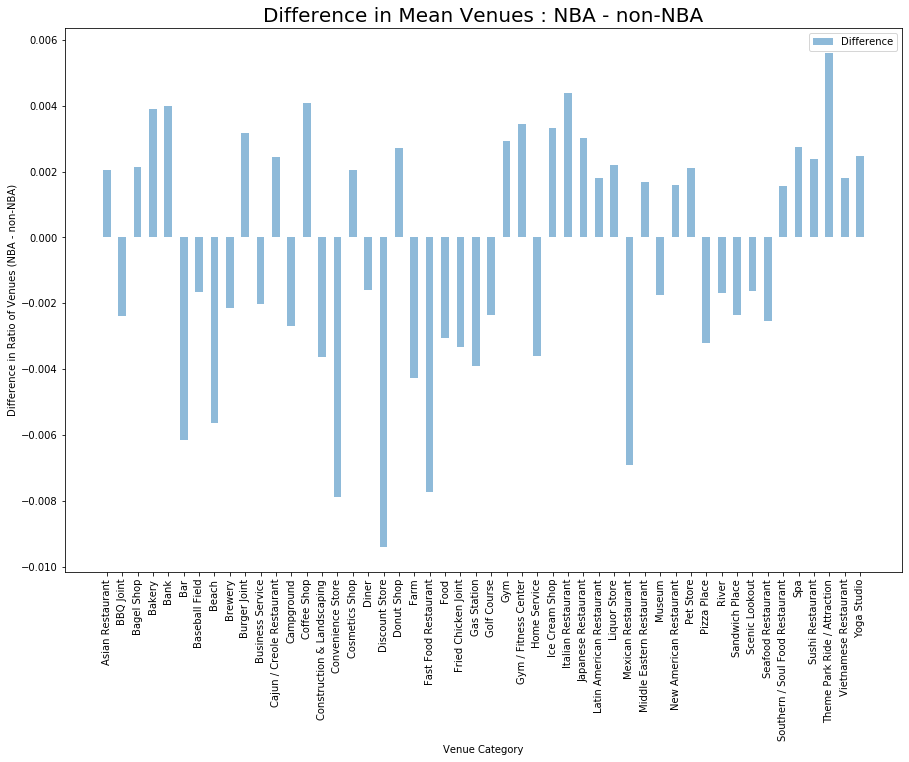

In [59]:
plt.figure(figsize=(15,10))
plt.bar(df_top_venues.index.values,df_top_venues['diff'],alpha=0.5, label='Difference', align='center', width=0.5)
plt.xticks(rotation=90)
plt.title('Difference in Mean Venues : NBA - non-NBA', size=20)
plt.ylabel('Difference in Ratio of Venues (NBA - non-NBA)')
plt.xlabel('Venue Category')
plt.legend(loc='best')
plt.show()

### Methodology -- Clustering

To distinguish potentail NBA cities, we will break the NBA cities up into three average NBA cities. One for the biggest 10 cities, one for the next biggest 10 cities and one for the smallest 7 cities. We will then perform a KMeans clustering on this data set to see how close each non-NBA city resembles these means

In [62]:
# import the module
from sklearn.cluster import KMeans
from sklearn.cluster import DBSCAN
from sklearn.preprocessing import StandardScaler

In [63]:
# prepare the dataframe for the KNN algorithm
# break the NBA cities into two average NBA cities, one for a large city and another for a small city
large_NBA_cities = df_cities[(df_cities['NBA']==1)][0:10].groupby('NBA').mean()
med_NBA_cities = df_cities[(df_cities['NBA']==1)][11:20].groupby('NBA').mean()
small_NBA_cities = df_cities[(df_cities['NBA']==1)][21:27].groupby('NBA').mean()

In [64]:
large_NBA_cities['City']='Large'
large_NBA_cities['State']='Large'

med_NBA_cities['City']='Med'
med_NBA_cities['State']='Med'

small_NBA_cities['City']='Small'
small_NBA_cities['State']='Small'

large_NBA = pd.DataFrame(large_NBA_cities.reset_index())
med_NBA = pd.DataFrame(med_NBA_cities.reset_index())
small_NBA = pd.DataFrame(small_NBA_cities.reset_index())
large_NBA

,NBA,Population,Density,PCI,TV,Long,Lat,MinDistance,Zoo Exhibit,ATM,...,Whisky Bar,Wine Bar,Wine Shop,Winery,Wings Joint,Women's Store,Yoga Studio,Zoo,City,State
0,1,2529819.300,3689.200,23769.050,2982333.000,-96.104,35.501,0.000,0.000,0.001,...,0.000,0.004,0.002,0.000,0.004,0.001,0.004,0.001,Large,Large


In [95]:
# Create a kmeans data set by dropping the nba city data and appending the average nba city data
df_kmeans = df_cities[df_cities['NBA']==0]
df_kmeans = df_kmeans.append(large_NBA,ignore_index=True)
df_kmeans = df_kmeans.append(med_NBA,ignore_index=True)
df_kmeans = df_kmeans.append(small_NBA,ignore_index=True)

In [96]:
# remove items that can't or shouldn't appear in the clustering algorithm (City, State, Long,Lat)
df_cluster = df_kmeans.drop(['City','State','Long','Lat','NBA'],1)#,'Population','TV','Density','PCI'],1)
df_cluster.dropna(inplace=True)
df_cluster

,ATM,Accessories Store,Acupuncturist,Adult Boutique,Advertising Agency,Afghan Restaurant,African Restaurant,Airport Terminal,American Restaurant,Amphitheater,...,Weight Loss Center,Whisky Bar,Wine Bar,Wine Shop,Winery,Wings Joint,Women's Store,Yoga Studio,Zoo,Zoo Exhibit
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
91,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
92,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
93,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
94,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [97]:
# setup and run the KMeans clustering
num_clusters = 7
km = KMeans(n_clusters=num_clusters,random_state=0, init='k-means++').fit(df_cluster)
km.labels_

array([4, 4, 4, 3, 5, 4, 4, 5, 5, 5, 5, 0, 0, 5, 3, 5, 5, 6, 5, 6, 1, 0,
       0, 0, 0, 6, 6, 0, 1, 6, 3, 6, 1, 6, 6, 1, 1, 1, 6, 1, 6, 6, 3, 1,
       0, 6, 1, 6, 6, 1, 6, 6, 1, 0, 6, 6, 1, 1, 6, 1, 6, 6, 6, 1, 6, 6,
       6, 1, 1, 0, 1, 6, 6, 6, 6, 6, 6, 0, 3, 0, 6, 6, 6, 1, 6, 1, 6, 6,
       6, 6, 6, 6, 0, 2, 3, 0], dtype=int32)

As a second clustering approach, let's consider Agglomerative clustering

In [98]:
from sklearn.cluster import AgglomerativeClustering 

In [99]:
agglom = AgglomerativeClustering(n_clusters = 4, linkage = 'complete')
agglom.fit(df_cluster)
agglom.labels_

array([1, 1, 1, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 3, 2, 0])

We can now assign the clusters in the dataframe, bring back in the city, state, long and lat and visualize the results

In [101]:
df_cluster['Label']=km.labels_
df_cluster['City']=df_kmeans['City']
df_cluster['State']=df_kmeans['State']
df_cluster['Long']=df_kmeans['Long']
df_cluster['Lat']=df_kmeans['Lat']
df_cluster['NBA']=df_kmeans['NBA']
df_cluster['Population']=df_kmeans['Population']
df_cluster['Density']=df_kmeans['Density']
df_cluster['TV']=df_kmeans['TV']
df_cluster['PCI']=df_kmeans['PCI']

In [102]:
df_cluster

,ATM,Accessories Store,Acupuncturist,Adult Boutique,Advertising Agency,Afghan Restaurant,African Restaurant,Airport Terminal,American Restaurant,Amphitheater,...,Women's Store,Yoga Studio,Zoo,Zoo Exhibit,Label,City,State,Long,Lat,NBA
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,4,San Diego,California,-117,33,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,4,Jacksonville,Florida,-82,30,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,4,Columbus,Ohio,-83,40,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,3,Seattle,Washington,-122,48,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,5,El Paso,Texas,-106,32,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
91,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,6,Wilmington,North Carolina,-78,34,0
92,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,Hartford,Connecticut,-73,42,0
93,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,2,Large,Large,-96,36,1
94,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,3,Med,Med,-95,40,1


Determine how many cities fall under each cluster

In [103]:
df_cluster['Label'].value_counts()

6    41
1    20
0    14
5     9
3     6
4     5
2     1
Name: Label, dtype: int64

Visualize the clusters on a map of of the US

In [109]:
# create map of US
latitude = 38.8777
longitude = -97.38
map_us = folium.Map(location=[latitude, longitude], zoom_start=4)

# add city markers to map, color them Red if they are already an NBA city and Blue otherwise
colors = ['red','blue','black','green','yellow','orange','purple']
for lat, lng, city, nba, label, pop in zip(df_cluster['Lat'], df_cluster['Long'], df_cluster['City'], df_cluster['NBA'],df_cluster['Label'],df_cluster['Population']):
    c = colors[label]
    r = min(max(round(pop/100000,0),1),10)
    fc = c
    if nba==1:
        if city=='Large':
            r = 15
            lat = 40
            lng = -128
        if city=='Med':
            r = 10
            lat = 38
            lng = -128
        if city=='Small':
            r = 5
            lat = 36
            lng = -128
        label = folium.Popup(city+' ' +str(label), parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius=r,
        popup=label,
        color=c,
        fill=True,
        fill_color=c,
        fill_opacity=0.1,
        legend_name='NBA Team',
        parse_html=False).add_to(map_us)  

map_us

### Section 4 - Results
Let's look at the results. 

From the map above, the three NBA city means were returned in 3 different clusters
- *Large* Cities = BLACK
- *Medium* Cities = GREEN
- *Small* Cities = RED

Of these, the medium sized city was in the group with the smallest number of potential cities

The case for using the Medium sized cities is also that the population and TV market size should be able to accomodate an NBA team

Looking at the cities associated with this group...

In [106]:
# setting up the formatting
pd.options.display.float_format = '{:,.0f}'.format

NBA_candidates = df_cluster[df_cluster['Label']==3]
cols = ['City','State','Population','TV','PCI','Lat','Long']
NBA_candidates[cols]

,City,State,Population,TV,PCI,Lat,Long
3,Seattle,Washington,"744,955","1,854,810","39,322",48,-122
14,Virginia Beach,Virginia,"450,189","1,744,733","20,328",37,-76
30,St. Petersburg,Florida,"265,098","1,875,420","21,784",28,-83
42,Tacoma,Washington,"216,279","1,854,810","39,322",47,-122
78,Dayton,Ohio,"140,640","1,565,890","21,598",40,-84
94,Med,Med,"648,833","1,428,650","28,424",40,-95


### Section 5 - Discussion

Based on the information in this study and report, the recommendation would be to select Seattle as the  location for the next NBA city. Not only does it have the largest population amongst our candidate cities, but another city on the list, Tacoma, is in the same state and would likely support interest in a new Seattle NBA team.